In [3]:
import pandas as pd
import quandl
import pickle
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style


In [4]:
style.use('ggplot')

In [5]:
df = quandl.get('WIKI/GOOGL')

In [6]:
df.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [8]:
df['HL_PCT'] = ((df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'])*100
df['PCT_CHANGE'] = ((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'])*100
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_CHANGE
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [9]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHANGE', 'Adj. Volume']]

In [10]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [11]:
df.fillna(-99999, inplace=True)

In [12]:
forecast_out = int(math.ceil(0.01*(len(df))))

In [13]:
forecast_col = 'Adj. Close'

In [14]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [15]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [16]:
X = np.array(df.drop(['label'], 1)) #Features
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)
y = np.array(df['label']) #Labels
y = np.array(df['label'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf = LinearRegression()

In [19]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)   #Dumping the classifier (saving)
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)              #Redefined classifier

In [22]:
accuracy = clf.score(X_test, y_test)

In [23]:
accuracy

0.9781139144129994

In [24]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9769709849824343


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly 0.6242650084685473


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf 0.7829587883379138


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


sigmoid 0.8837172115978826


## PREDICTING STUFFS

In [25]:
#Using classifiers for predicting values

# if we use X[-forecast_out:] i.e X_lately then we are predicting the stock values for next forecast_out no, of days

In [26]:
forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

[892.44094819 854.32479368 843.23107885 900.20391579 906.99639464
 902.49701969 881.92478247 886.17389097 901.62410163 900.16844018
 885.85373684 789.49407744 821.76732737 910.58556823 871.75354667
 894.25787223 917.55381494 881.96008493 896.34353981 800.74166516
 910.99808822 882.3053159  918.88039723 873.45096824 827.0012944
 896.90140636 928.70422519 914.79625602 909.18513492 948.62730251
 942.9237265  928.86212282 917.21606182 916.31169183 773.53649641] 0.9781139144129994 35


In [27]:
#ABove shows the predicted stock values for next 35 days

## PLOTTING THE GRAPH - VISUALIZATION

In [28]:
df['Forecast'] = np.NAN   #Whole column with NAN numbers

In [29]:
last_date = df.iloc[-1].name
# print(last_date)
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(next_unix)
print(last_date)

1517875200.0
2018-02-05 00:00:00


In [30]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix = next_unix + one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

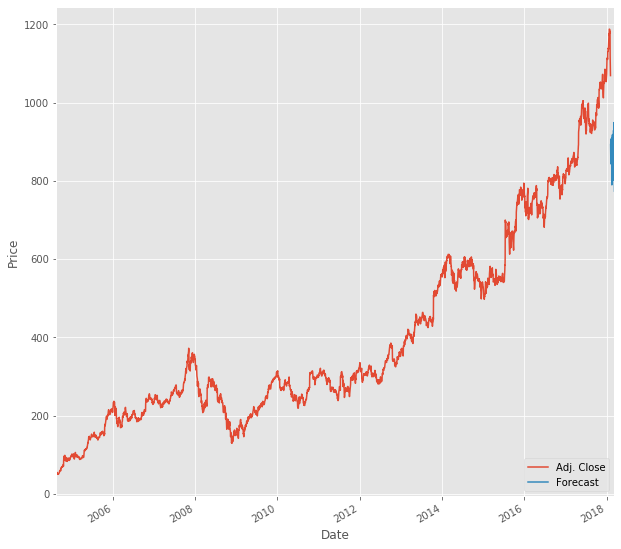

In [31]:
plt.figure(figsize=(10,10))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [32]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN


In [33]:
df.tail()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,942.923727
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,928.862123
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,917.216062
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,916.311692
2018-03-12 05:30:00,NaN,NaN,NaN,NaN,NaN,773.536496
